<h1><b>Weather Prediction during World War II</b></h1>

<p>While exploring the Aerial Bombing Operations of World War Two dataset, and recalling that the D-Day landings were nearly postponed due to poor weather, I sought out weather reports from the period to compare with missions in the bombing operations dataset.</p>
<p>The dataset used here contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.</p>
<p>
    The following tasks are to be performed: 
    <ul>
        <li>Clean the data</li>
        <li>To determine wether there is a relationship between daily maximum and minimum temperature</li>
        <li>To determine wether the maximum temperature can be predicted using the minimum temperature</li>
    </ul>
</p>

<h2>Importing the reqiured modules</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline 

<h2>Loading the data in pandas data frame</h2>

In [4]:
df = pd.read_csv('Summary of Weather.csv')

In [5]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Cleaning the data</h2>
<p>Droping the columns containing NaN values</p>

In [6]:
df.dropna(axis = 1, inplace=True)

In [7]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,42,7,1
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,42,7,2
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,42,7,3
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,42,7,4
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,42,7,5


In [8]:
df.describe()

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530
std,20953.209402,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541
min,10001.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000
25%,11801.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000
50%,22508.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000
75%,33501.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000
max,82506.000000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000


<h3>Determining the relationship between daily minimum and maximum temperature</h3>
<p>Plotting the data</p>

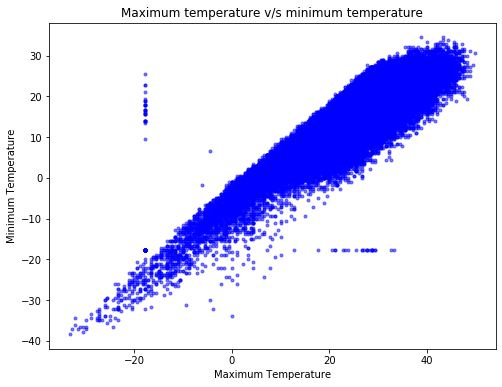

In [9]:
plt.figure(figsize=(8,6))

plt.scatter(df.MaxTemp, df.MinTemp, marker = '.', color = 'blue', alpha = 0.5)
plt.title("Maximum temperature v/s minimum temperature")
plt.xlabel('Maximum Temperature')
plt.ylabel('Minimum Temperature')
plt.show()

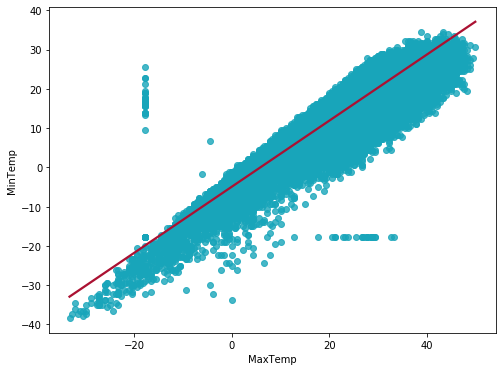

In [10]:
# Plotting a regplot of the same data 
plt.figure(figsize = (8,6))
sns.regplot('MaxTemp', 'MinTemp', data = df, scatter_kws={'color':'#18a5ba','marker':'.'}, line_kws={'color':'#ab1132'})

From the above plots it is evident that the relationship between minimum and maximum temperature is linear and a linear regression model can be used to fit the data 

<h2>Using a linear regression model to fit the data</h2>

Defining the predictor and target variables

In [18]:
x = df[['MinTemp']] #predictor Variable
y = df[['MaxTemp']] #target variable

In [19]:
print(x[0:5])

     MinTemp
0  22.222222
1  21.666667
2  22.222222
3  22.222222
4  21.666667



Splitting the data for training and testing


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [21]:
print(x_train.shape,y_train.shape)

(83328, 1) (83328, 1)


Fitting a linear regression model using the train data 

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Getting the coefficient and intercept of our fitted model  

In [23]:
print("Coefficient: ",lm.coef_)
print("Intercept: ", lm.intercept_)

Coefficient:  [[0.91895795]]
Intercept:  [10.68834666]


Plotting the model 

(-50, 50)

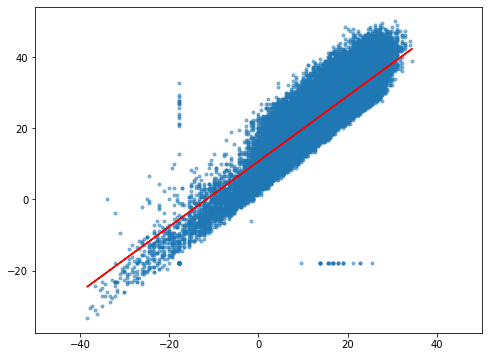

In [30]:
plt.figure(figsize= (8,6))

plt.scatter(x_train,y_train,marker='.',alpha= 0.5)
plt.plot(x_train, lm.coef_[0][0] * x_train + lm.intercept_[0], color = 'r')
plt.xlim(-50,50)
plt.show()

<h3>Evaluating the model: Determining wether maximum temperature can be predicted from minimum temperature</h3>

Getting the r-squared value for our model 

In [31]:
from sklearn.metrics import r2_score

y_hat = lm.predict(x_test)

print("R-squared value is: ",r2_score(y_hat, y_test))

R-squared value is:  0.7035363071255685


Our model has a R-Squared value of 0.7035363071255685 or around 70 percent which indicates our model provides a good fit fir our data.

Getting the Mean Squared Error (MSE) and Mean Absolute Error (MAE) value for our model 


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("The mean squared error is: %f" % mean_squared_error(y_hat, y_test))
print("The mean absolute error is: %f" % mean_absolute_error(y_hat ,y_test))

The mean squared error is: 17.249542
The mean absolute error is: 3.184930


<h2>Since our linear Regression model has high R Squared value and low MAE and MSE it can said that it fits the data well and therefore, it can be concluded that maximum temperature can be predicted from mimimum temperature.</h2>